# DS400: Assignment III (Python)

##### Christopher Forschner (Student ID: 6290771)
##### January 31, 2022
I worked together with Janik Müller in Python and R

## Setting up a new GitHub repository
(1) Register on github.com in case you have not done this already.<br>
(2) Initialize a new public repository for this assignment on GitHub.<br>
(3) For the following exercises of this assignment, follow the standard Git workflow (i.e., pull the latest
version of the project to your local computer, then stage, commit, and push all the modifications that you
make throughout the project). Every logical programming step should be well documented on GitHub
with a meaningful commit message, so that other people (e.g., your course instructor) can follow and
understand the development history. You can do this either using Shell commands or a Git GUI of your
choice. <br>
(4) In the HTML file that you submit, include the hyperlink to the project repository (e.g., https://github.
com/yourUserName/yourProjectName)

In [ ]:
#link to the Github Page
git_link="https://github.com/chrisfor97/Assignment05cf.git"

## Getting to know the API
(5) Visit the documentation website for the API provided by ticketmaster.com (see here). Familiarize yourself
with the features and functionalities of the Ticketmaster Discovery API. Have a particular look at
rate limits.<br>

Features of the Ticketmaster Discovery API:<br>
* Searching events by keyword in a certain location (lat/long)
* Getting events for a particular artist OR venue in a specific country/city/zip code/DMA/etc
* Getting hi-res images for a particular event or artist.
* Search events of a certain genre in a particular location for a certain promoter
* rate limits: 5000 API calls per day and rate limitation of 5 requests per second
+ increasing rate limit is also possible but specific conditions need to be fullfilled. However, fo this Assignment, this is not necessary


(6) Whithin the scope of this assignment, you do not have to request your own API key. Instead retrieve
a valid key from the API Explorer. This API key enables you to perform the GET requests needed
throughout this assignment. Even though this API key is not secret per se (it is publicly visible on the
API Explorer website), please comply to the common secrecy practices discussed in the lecture and the
tutorial: Treat the API key as a secret token. Your API key should neither appear in the code that you
are submitting nor in your public GitHub repository.<br>

In [1]:
import os
os.chdir('C:/Users/chris/Desktop/Uni/Uni_tuebingen/semester_1/datascience_project_management/assignment05')

In [2]:
with open("ticketmaster_api.py") as script:
    exec(script.read())

## Interacting with the API - the basics
(7) Perform a first GET request, that searches for event venues in Germany (countryCode = "DE"). Extract
the content from the response object and inspect the resulting list. Describe what you can see.<br>

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import requests
import time

In [5]:
#perform the get request
tickets_content=requests.get('https://app.ticketmaster.com/discovery/v2/venues',
                params = {"apikey": api_key1, "countryCode": "DE",'locale':'*'}).json()  
tickets_content #checking if request worked correctly                                   

{'_embedded': {'venues': [{'name': 'Grosse Freiheit 36',
    'type': 'venue',
    'id': 'KovZpZAn6vEA',
    'test': False,
    'url': 'http://www.ticketmaster.de/venue/287636',
    'locale': 'en-de',
    'images': [{'ratio': '16_9',
      'url': 'https://s1.ticketm.net/dbimages/962v.',
      'width': 205,
      'height': 115,
      'fallback': False}],
    'postalCode': '22767',
    'timezone': 'Europe/Berlin',
    'city': {'name': 'Hamburg'},
    'country': {'name': 'Germany', 'countryCode': 'DE'},
    'address': {'line1': 'Grosse Freiheit 36'},
    'location': {'longitude': '9.957905', 'latitude': '53.551187'},
    'markets': [{'name': 'Germany', 'id': '210'}],
    'dmas': [{'id': 610}],
    'boxOfficeInfo': {'phoneNumberDetail': 'Telefon tagsüber: (040) 31 77 78- 0 Große Freiheit 36 22767 Hamburg E-Mail: info@grossefreiheit36.de'},
    'upcomingEvents': {'_total': 1, 'mfx-de': 1, '_filtered': 0},
    'ada': {'adaPhones': '+49.(0)1805 - 969 0000 (14 Ct./Min.)',
     'adaCustomCopy': 

In [6]:
#extract content from the response object
len(tickets_content['_embedded']['venues']) #we have 20 entries in this list
a=type(tickets_content['_embedded']['venues'])
b=type(tickets_content['_embedded']['venues'][0]) #exemplary check type of the first entry of this list 
print(a,b)
pages=tickets_content['page']['totalPages']
pages

<class 'list'> <class 'dict'>


647

(8) Extract the name, the city, the postalCode and address, as well as the url and the longitude
and latitude of the venues to a data frame.

In [7]:
tickets_length=len(tickets_content['_embedded']['venues'])
tickets=tickets_content['_embedded']['venues'] #this is a list of dictionaries

names=[]
city=[]
postal_Code=[]
address=[]
url=[]
longitude=[]
latitude=[]


for i in tickets_content['_embedded']['venues']:
    if 'name' in i:
        names.append(i['name'])
    else:
        names.append('N/A')
    if 'city' in i:
        city.append(i['city']['name'])
    else:
        city.append('N/A')            
    if 'postalCode' in i:
        postal_Code.append(i['postalCode'])
    else:
        postal_Code.append('N/A')
    if 'address' in i:
        address.append(i['address']['line1'])
    else:
        address.append('N/A')
    if 'url' in i:
        url.append(i['url'])
    else:
        url.append('N/A')
    if 'location' in i:
        longitude.append(i['location']['longitude'])
        latitude.append(i['location']['latitude'])
    else:
        longitude.append('NA')
        latitude.append('NA')                    

#store them in a data frame
var_dict={'name':names,
            'city':city,
            'postalCode':postal_Code,
            'address':address,
            'url':url,
            'longitude':longitude,
            'latitude':latitude}
tickets_content_df=pd.DataFrame(var_dict) 
print(tickets_content_df)        
  
   


                          name               city postalCode  \
0           Grosse Freiheit 36            Hamburg      22767   
1                    Gruenspan            Hamburg      22767   
2            Huxleys Neue Welt             Berlin      10967   
3              Zentrum am Park       Emmelshausen      56281   
4     Stadthalle (Theatersaal)            Mülheim      45479   
5                Schlossgarten           Bruchsal      76646   
6                   Stadthalle         Hockenheim      68766   
7                          FZW           Dortmund      44263   
8                  Arena Trier              Trier      54292   
9                Eissporthalle          Memmingen      87700   
10       Stadthalle Gersthofen         Gersthofen      86368   
11       Feierwerk (Kranhalle)             Munich      81373   
12        Feierwerk (Hansa 39)             Munich      81373   
13  Burghof - STIMMEN-Festival            Lörrach      79539   
14          Schiesssportanlage      Neu 

In [ ]:
tickets_content_df

## Interacting with the API - advanced
(9) Have a closer look at the list element named page. Did your GET request from exercise (7) return all
event locations in Germany? Obviously not - there are of course much more venues in Germany than
those contained in this list. Your GET request only yielded the first results page containing the first
20 out of several thousands of venues. Check the API documentation under the section Venue Search.
How can you request the venues from the remaining results pages? Iterate over the results pages and
perform GET requests for all venues in Germany. After each iteration, extract the seven variables name,
city, postalCode, address, url, longitude, and latitude. Join the information in one large
data frame. Print the first 10 rows and the shape of the resulting data frame. The resulting data frame
should look something like this (note that the exact number of search results may have changed since
this document has been last modified):

In [ ]:
# creating a function for the request object
def venue_request(url,api_key,country_Code,page):
    link=url
    api_Key=api_key
    countryCode=country_Code
    venues_list=requests.get(url, params={"apikey": api_Key, "countryCode": countryCode, 'page':page,'locale':'*'}).json()
    return(venues_list)
#create a function to extract the values from the task before

In [9]:
#prepare the environment for the loop
pages=list(range(tickets_content['page']['totalPages']))    

In [10]:
venues_Liste=[None]*(tickets_content['page']['totalPages']) 
for p in pages:
    time.sleep(0.2)
    venues_Liste[p]=requests.get('https://app.ticketmaster.com/discovery/v2/venues', params={"apikey": api_key1, "countryCode": 'DE', 'page':p,'locale':'*'}).json()

In [145]:
#find entries in the list with an error message
error_pages=list()
for e in pages:
    if '_embedded' in venues_Liste[e]:
        continue
    else:
        page_index=e
        error_pages.append(page_index)
#print the error message
print(error_pages)
for i in error_pages:
    print(venues_Liste[i])
#reverse order of error pages
error_pages.reverse()
print(error_pages)
venues_Liste2=venues_Liste.copy()

[174, 278, 290, 416, 478, 546, 591, 617]
{'fault': {'faultstring': 'Spike arrest violation. Allowed rate : MessageRate{messagesPerPeriod=5, periodInMicroseconds=1000000, maxBurstMessageCount=1.0}', 'detail': {'errorcode': 'policies.ratelimit.SpikeArrestViolation'}}}
{'fault': {'faultstring': 'Spike arrest violation. Allowed rate : MessageRate{messagesPerPeriod=5, periodInMicroseconds=1000000, maxBurstMessageCount=1.0}', 'detail': {'errorcode': 'policies.ratelimit.SpikeArrestViolation'}}}
{'fault': {'faultstring': 'Spike arrest violation. Allowed rate : MessageRate{messagesPerPeriod=5, periodInMicroseconds=1000000, maxBurstMessageCount=1.0}', 'detail': {'errorcode': 'policies.ratelimit.SpikeArrestViolation'}}}
{'fault': {'faultstring': 'Spike arrest violation. Allowed rate : MessageRate{messagesPerPeriod=5, periodInMicroseconds=1000000, maxBurstMessageCount=1.0}', 'detail': {'errorcode': 'policies.ratelimit.SpikeArrestViolation'}}}
{'fault': {'faultstring': 'Spike arrest violation. Allo

In [146]:
#remove entries with error message
for i in error_pages:
   venues_Liste2.pop(i)
vpages=len(venues_Liste2)
vpages=list(range(vpages))   

In [147]:
#create a new data frame with every page
venues_de=pd.DataFrame()

for p in vpages:
    names_de=[]
    city_de=[]
    postal_Code_de=[]
    address_de=[]
    url_de=[]
    longitude_de=[]
    latitude_de=[]
    for i in venues_Liste2[p]['_embedded']['venues']:
        if 'name' in i:
            names_de.append(i['name'])
        else:
            names_de.append(np.NaN)
        if 'city' in i:
            city_de.append(i['city']['name'])
        else:
            city_de.append(np.NaN)            
        if 'postalCode' in i:
            postal_Code_de.append(i['postalCode'])
        else:
            postal_Code_de.append('N/A')
        if 'address' in i:
            if 'line1' in i['address']:
                address_de.append(i['address']['line1'])
            else:
                address_de.append(np.NaN)    
        else:
            address_de.append(np.NaN)
        if 'url' in i:
            url_de.append(i['url'])
        else:
            url_de.append(np.NaN)
        if 'location' in i:
            longitude_de.append(i['location']['longitude'])
            latitude_de.append(i['location']['latitude'])
        else:
            longitude_de.append(np.NaN)
            latitude_de.append(np.NaN)                    

    #store them in a data frame
    var_dict={'name':names_de,
            'city':city_de,
            'postalCode':postal_Code_de,
            'address':address_de,
            'url':url_de,
            'longitude':longitude_de,
            'latitude':latitude_de}
    venues_df=pd.DataFrame(var_dict)
    venues_de=pd.concat([venues_de,venues_df]) 
    

In [148]:
venues_de.head()

,name,city,postalCode,address,url,longitude,latitude
0,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187
1,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
2,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.42138,52.486391
3,Zentrum am Park,Emmelshausen,56281,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.55656,50.15544
4,Stadthalle (Theatersaal),Mülheim,45479,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.87471,51.42778


## Visualizing the extracted data
(10) Below, you can find code that produces a map of Germany. Add points to the map indicating the
locations of the event venues across Germany.<br>

In [77]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

In [97]:
crs={'init':'epsg:4326'}

In [99]:
venues_de['longitude'] = pd.to_numeric(venues_de['longitude'])
venues_de['latitude'] = pd.to_numeric(venues_de['latitude'])

In [100]:
geometry=[Point(xy) for xy in zip(venues_de['longitude'],venues_de['latitude'])]

In [101]:
geo_df=gpd.GeoDataFrame(venues_de, crs=crs, geometry=geometry)
geo_df.head()

c:\Users\chris\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,name,city,postalCode,address,url,longitude,latitude,geometry
0,Grosse Freiheit 36,Hamburg,22767,Grosse Freiheit 36,http://www.ticketmaster.de/venue/287636,9.957905,53.551187,POINT (9.95791 53.55119)
1,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885,POINT (9.95807 53.55188)
2,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.421380,52.486391,POINT (13.42138 52.48639)
3,Zentrum am Park,Emmelshausen,56281,Rhein-Mosel-Straße 45,https://www.ticketmaster.de/venue/zentrum-am-p...,7.556560,50.155440,POINT (7.55656 50.15544)
4,Stadthalle (Theatersaal),Mülheim,45479,Theodor-Heuss-Platz 1,https://www.ticketmaster.de/venue/stadthalle-t...,6.874710,51.427780,POINT (6.87471 51.42778)


<AxesSubplot:>

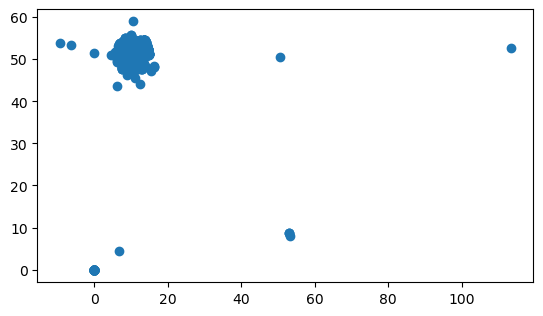

In [102]:
geo_df.plot()

<AxesSubplot:>

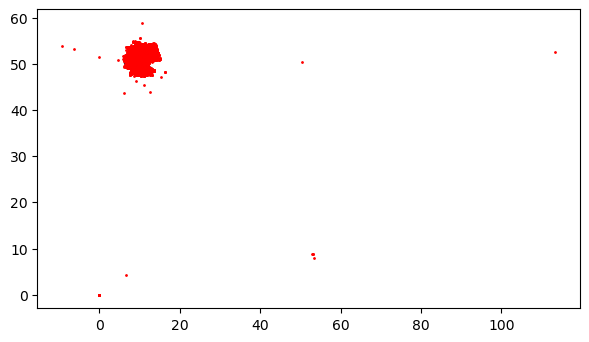

In [133]:
fig,ax=plt.subplots(figsize=(7,7))

# get a base map of Germany
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map = map[map.name == "Germany"]
# plot the map
map.plot(ax = ax, color='grey',alpha=1,linewidth=1,cmap='cividis',zorder=1)
# add geodata to to the map
geo_df.plot(ax=ax,color='red',markersize=1,zorder=2)



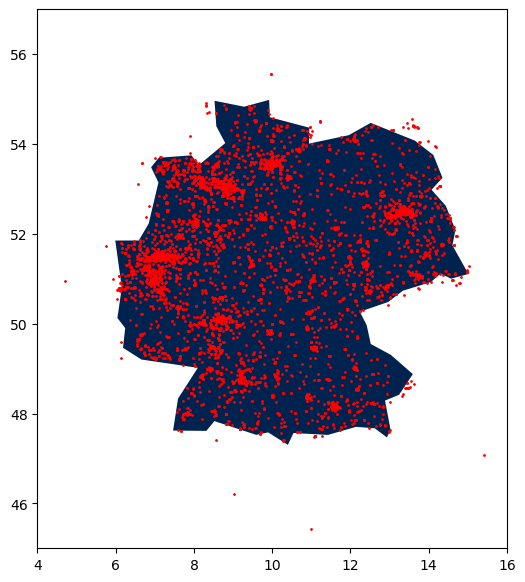

In [132]:
fig,ax=plt.subplots(figsize=(7,7))

# get a base map of Germany
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map = map[map.name == "Germany"]
# plot the map

# plot the map
map.plot(ax = ax, color='grey',alpha=1,linewidth=1,cmap='cividis',zorder=1)
# add geodata to to the map
geo_df.plot(ax=ax,color='red',markersize=1,zorder=2)

ax.set_xlim([4,16])
ax.set_ylim([45,57])

plt.show()

(11) You will find that some coordinates lie way beyond the German borders and can be assumed to be faulty.
Set coordinate values to NA where the value of longitude is outside the range (5.866, 15.042) or
where the value of latitude is outside the range (47.270, 55.059) (these coordinate ranges have
been derived from the extreme points of Germany as listed on Wikipedia (see here). For extreme points
of other countries, see here). <br>

In [107]:
#set values outside the intervals to NaN
venues_de[['longitude','latitude']]=venues_de[['longitude','latitude']].where(((venues_de['longitude']>5.866)&(venues_de['longitude']<15.042))&((venues_de['latitude'] > 47.270) & (venues_de['latitude'] < 55.059)))

c:\Users\chris\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

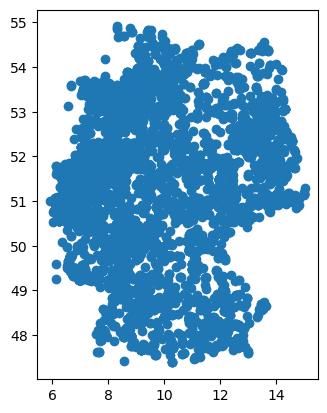

In [110]:
#set values outside the intervals to NaN
venues_de[['longitude','latitude']]=venues_de[['longitude','latitude']].where(((venues_de['longitude']>5.866)&(venues_de['longitude']<15.042))&((venues_de['latitude'] > 47.270) & (venues_de['latitude'] < 55.059)))
geometry2=[Point(xy) for xy in zip(venues_de['longitude'],venues_de['latitude'])]
geo_df2=gpd.GeoDataFrame(venues_de, crs=crs, geometry=geometry2)
geo_df2.plot()

<AxesSubplot:>

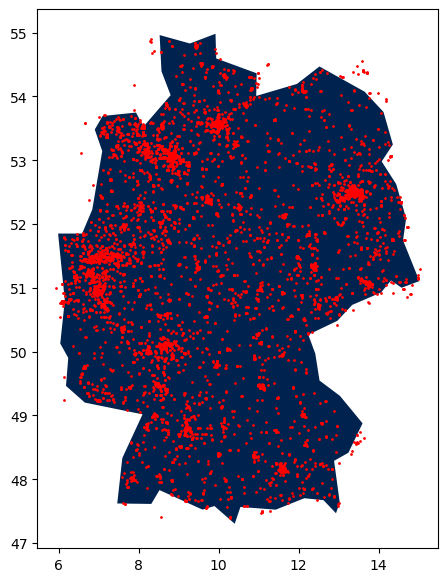

In [112]:
fig,ax=plt.subplots(figsize=(7,7))

# get a base map of Germany
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map = map[map.name == "Germany"]
# plot the map

# plot the map
base=map.plot(ax = ax, color='grey',alpha=1,linewidth=1,cmap='cividis',zorder=1)
# add geodata to to the map
geo_df2.plot(ax=ax,color='red',markersize=1,zorder=2)



## Event locations in other countries
(12) Repeat exercises (9)–(11) for another European country of your choice. (Hint: Clean code pays off! If
you have coded the exercises efficiently, only very few adaptions need to be made.)

In [149]:
#exercise 9 country of choice Switzerland ('CountryCode:FR')
tickets_ch=requests.get('https://app.ticketmaster.com/discovery/v2/venues',
                params = {"apikey": api_key1, "countryCode": "CH",'locale':'*'}).json()  
vpages_ch=list(range(tickets_ch['page']['totalPages'])) 

In [150]:
venues_list_ch=[None]*(tickets_ch['page']['totalPages']) 
for p in vpages_ch:
    time.sleep(0.2)
    venues_list_ch[p]=requests.get('https://app.ticketmaster.com/discovery/v2/venues',
                params = {"apikey": api_key1, "countryCode": "CH",'locale':'*','page':p}).json()  

In [151]:
#find entries in the list with an error message
error_pages3=list()
for p in vpages_ch:
    if '_embedded' in venues_list_ch[p]:
        continue
    else:
        page_index=p
        error_pages3.append(page_index)
#print the error message
print(error_pages3)
for i in error_pages3:
    print(venues_list_ch[i])
#reverse order of error pages
error_pages3.reverse()
print(error_pages3)
venues_list_ch2=venues_list_ch.copy()

[19]
{'fault': {'faultstring': 'Spike arrest violation. Allowed rate : MessageRate{messagesPerPeriod=5, periodInMicroseconds=1000000, maxBurstMessageCount=1.0}', 'detail': {'errorcode': 'policies.ratelimit.SpikeArrestViolation'}}}
[19]


In [154]:
for i in error_pages3:
   venues_list_ch2.pop(i)
vpages_ch2=len(venues_list_ch2)
vpages_ch2=list(range(vpages_ch2)) 

In [156]:
#create a new data frame with every page
venues_ch=pd.DataFrame()

for p in vpages_ch2:
    names=[]
    city=[]
    postal_Code=[]
    address=[]
    url=[]
    longitude=[]
    latitude=[]
    for i in venues_list_ch2[p]['_embedded']['venues']:
        if 'name' in i:
            names.append(i['name'])
        else:
            names.append(np.NaN)
        if 'city' in i:
            city.append(i['city']['name'])
        else:
            city.append(np.NaN)            
        if 'postalCode' in i:
            postal_Code.append(i['postalCode'])
        else:
            postal_Code.append('N/A')
        if 'address' in i:
            if 'line1' in i['address']:
                address.append(i['address']['line1'])
            else:
                address.append(np.NaN)    
        else:
            address.append(np.NaN)
        if 'url' in i:
            url.append(i['url'])
        else:
            url.append(np.NaN)
        if 'location' in i:
            longitude.append(i['location']['longitude'])
            latitude.append(i['location']['latitude'])
        else:
            longitude.append(np.NaN)
            latitude.append(np.NaN)                    

    #store them in a data frame
    var_dict={'name':names,
            'city':city,
            'postalCode':postal_Code,
            'address':address,
            'url':url,
            'longitude':longitude,
            'latitude':latitude}
    venues_df=pd.DataFrame(var_dict)
    venues_ch=pd.concat([venues_ch,venues_df]) 
    

In [157]:
venues_ch.head()

,name,city,postalCode,address,url,longitude,latitude
0,Salle de l'Alhambra,Genève,1204,Rue de la Rôtisserie 10,https://www.ticketmaster.ch/venue/salle-de-lal...,6.14652,46.20272
1,Kulturfabrik KUFA Lyss,Lyss,3250,Werdtstrasse 17,https://www.ticketmaster.ch/venue/kulturfabrik...,7.29471,47.08075
2,Klostersaal Stans,Stans,6370,Mürgstrasse 18,https://www.ticketmaster.ch/venue/klostersaal-...,8.36912,46.95569
3,ILFISHALLE Langnau,Langnau im Emmental,3550,Güterstrasse 14,https://www.ticketmaster.ch/venue/ilfishalle-l...,7.78612,46.93628
4,Stadion Letzigrund,Zürich,8048,Badenerstrasse 500,https://www.ticketmaster.ch/venue/stadion-letz...,8.50377,47.38265


<AxesSubplot:>

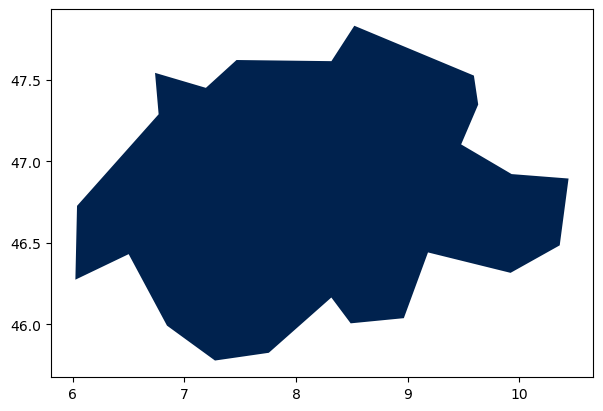

In [158]:
#exercise 10
fig,ax=plt.subplots(figsize=(7,7))
# get a base map of Switzerland
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map = map[map.name == "Switzerland"]
# plot the map
map.plot(ax = ax, color='grey',alpha=1,linewidth=1,cmap='cividis',zorder=1)

c:\Users\chris\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

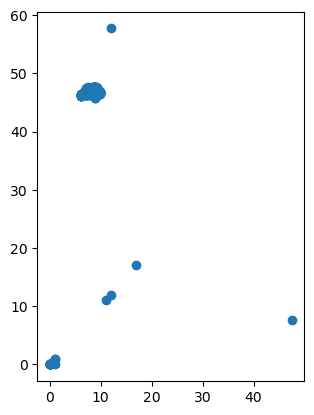

In [159]:
venues_ch['longitude'] = pd.to_numeric(venues_ch['longitude'])
venues_ch['latitude'] = pd.to_numeric(venues_ch['latitude'])
geometry3=[Point(xy) for xy in zip(venues_ch['longitude'],venues_ch['latitude'])]
geo_df3=gpd.GeoDataFrame(venues_ch, crs=crs, geometry=geometry3)
geo_df3.plot()


<AxesSubplot:>

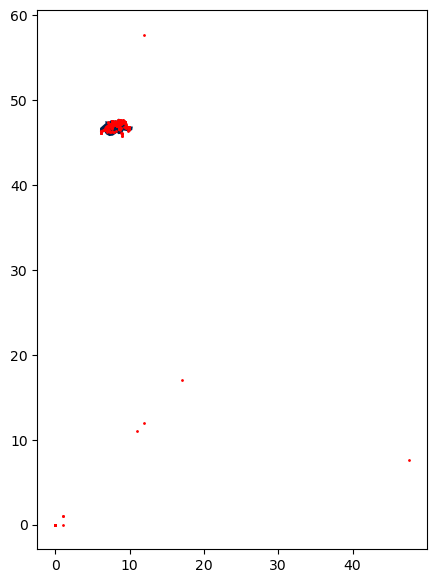

In [160]:
fig,ax=plt.subplots(figsize=(7,7))
# get a base map of Switzerland
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map = map[map.name == "Switzerland"]
# plot the map
map.plot(ax = ax, color='grey',alpha=1,linewidth=1,cmap='cividis',zorder=1)
#add the points
geo_df3.plot(ax=ax,color='red',markersize=1,zorder=2)


Extreme points for switzerland: 
* Longitude : [5.57, 10.29]
* Latitude: [45.49, 47.48}

c:\Users\chris\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

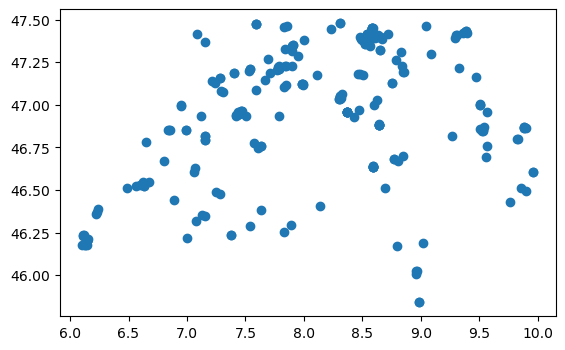

In [161]:
#set values outside the intervals to NaN
venues_ch[['longitude','latitude']]=venues_ch[['longitude','latitude']].where(((venues_ch['longitude']>5.57)&(venues_ch['longitude']<10.29))&((venues_ch['latitude'] > 45.49) & (venues_ch['latitude'] < 47.48)))
geometry4=[Point(xy) for xy in zip(venues_ch['longitude'],venues_ch['latitude'])]
geo_df4=gpd.GeoDataFrame(venues_ch, crs=crs, geometry=geometry4)
geo_df4.plot()

<AxesSubplot:>

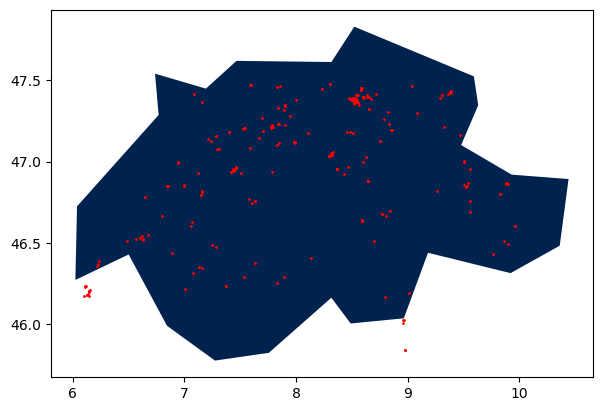

In [162]:
fig,ax=plt.subplots(figsize=(7,7))
# get a base map of Switzerland
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map = map[map.name == "Switzerland"]
# plot the map
map.plot(ax = ax, color='grey',alpha=1,linewidth=1,cmap='cividis',zorder=1)
#add the points
geo_df4.plot(ax=ax,color='red',markersize=1,zorder=2)